In [ ]:
!unzip /content/sas.zip

Archive:  /content/sas.zip
 extracting: DALI_Data-Anon.json     
 extracting: DALI_Data.json          


In [ ]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression


df = pd.read_json (r'DALI_Data-Anon.json')
df.head()

,year,gender,heightInches,happiness,stressed,sleepPerNight,socialDinnerPerWeek,alcoholDrinksPerWeek,caffeineRating,affiliated,numOfLanguages,gymPerWeek,hoursOnScreen,phoneType
0,'19,Female,63.0,4,2,7,3.0,4.0,1,1,2,3.0,6.0,iOS
1,'19,Male,71.0,4,5,7,3.0,8.0,6,1,2,4.0,6.0,iOS
2,'19,Female,63.0,4,4,7,3.0,2.0,1,1,1,0.0,9.0,Other
3,'19,Male,70.0,4,5,7,7.0,7.0,8,1,1,3.0,7.0,Android
4,'19,Male,70.0,4,8,7,3.0,3.0,3,1,2,5.0,6.0,iOS


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  66 non-null     object 
 1   gender                66 non-null     object 
 2   heightInches          65 non-null     float64
 3   happiness             66 non-null     int64  
 4   stressed              66 non-null     int64  
 5   sleepPerNight         66 non-null     int64  
 6   socialDinnerPerWeek   65 non-null     float64
 7   alcoholDrinksPerWeek  63 non-null     float64
 8   caffeineRating        66 non-null     int64  
 9   affiliated            66 non-null     int64  
 10  numOfLanguages        66 non-null     int64  
 11  gymPerWeek            65 non-null     float64
 12  hoursOnScreen         65 non-null     float64
 13  phoneType             66 non-null     object 
dtypes: float64(5), int64(6), object(3)
memory usage: 7.3+ KB


In [ ]:
df["year"] = df["year"].astype(str)
df["year"]

0     19
1     19
2     19
3     19
4     19
      ..
61    22
62    22
63    22
64    22
65    22
Name: year, Length: 66, dtype: object

In [ ]:
# df['year'] = df['year'].str[-2:]
df['year'] = df['year'].astype(str).astype(int)
df['year'] 

0     19
1     19
2     19
3     19
4     19
      ..
61    22
62    22
63    22
64    22
65    22
Name: year, Length: 66, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

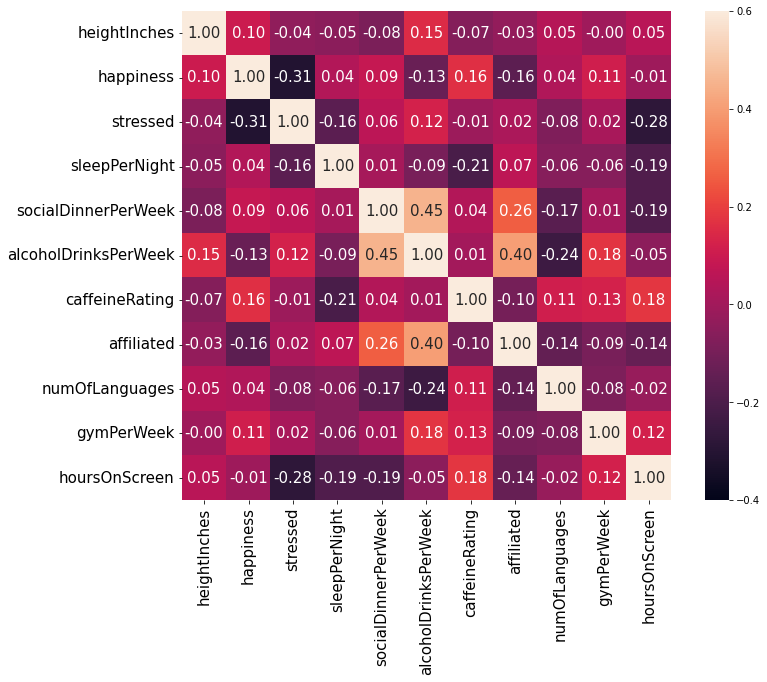

In [ ]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
hmap = sns.heatmap(corrmat, vmax = 0.6, vmin = -0.4, square=True, annot = True, fmt = '.2f', annot_kws={"size":15})
hmap.set_xticklabels(hmap.get_xmajorticklabels(), fontsize = 15)
hmap.set_yticklabels(hmap.get_ymajorticklabels(), fontsize = 15)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f601b370cd0>]],
      dtype=object)

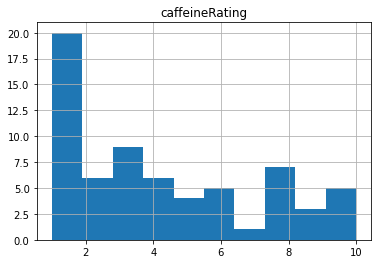

In [ ]:
df.hist(column='caffeineRating')